<a href="https://colab.research.google.com/github/HwangHanJae/Dacon_airline_classification/blob/main/logtransformation_logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 로그화, 로지스틱 회귀 모델 사용

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [ ]:
train_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/airline_dataset/train.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/airline_dataset/test.csv"
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/airline_dataset/sample_submission.csv"

df = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

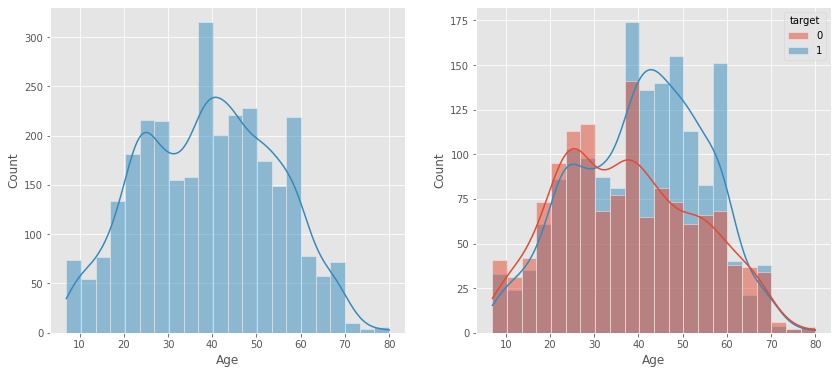

In [ ]:
f, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(data=df, x= "Age", kde= True, ax = ax[0])
sns.histplot(data=df, x= "Age", hue="target", kde= True, ax = ax[1])
plt.show()

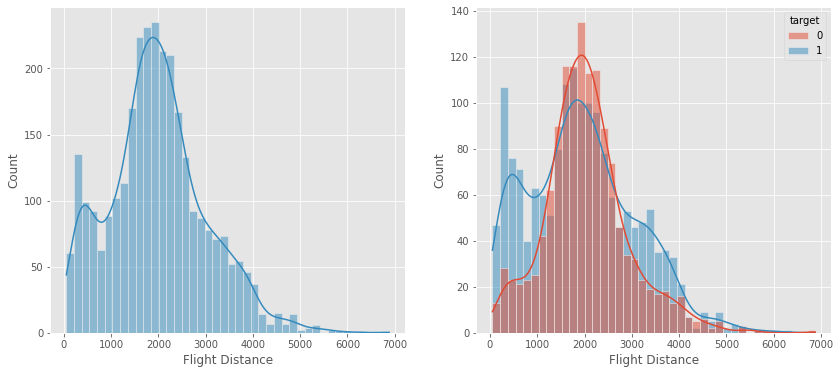

In [ ]:
f, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(data=df, x= "Flight Distance", kde= True, ax = ax[0])
sns.histplot(data=df, x= "Flight Distance", hue="target", kde= True, ax = ax[1])
plt.show()

In [ ]:
#로그화
log_feature = ["Age", "Flight Distance"]
for feature in log_feature:
  df[feature] = np.log1p(df[feature])

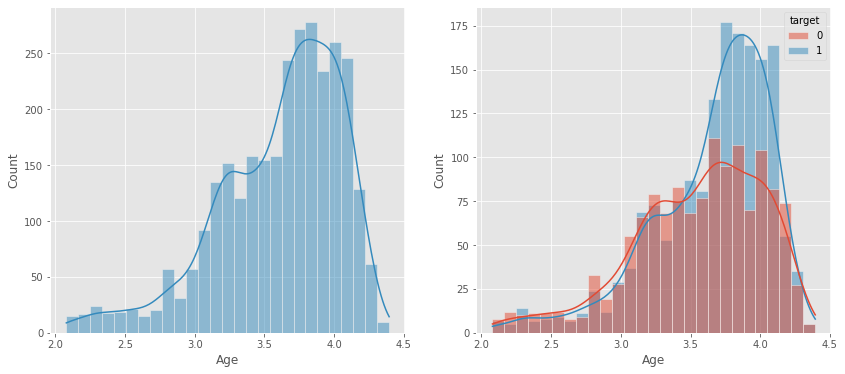

In [ ]:
f, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(data=df, x= "Age", kde= True, ax = ax[0])
sns.histplot(data=df, x= "Age", hue="target", kde= True, ax = ax[1])
plt.show()

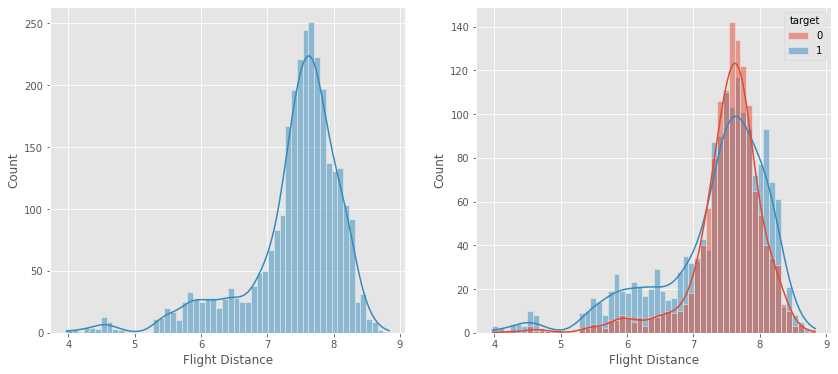

In [ ]:
f, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(data=df, x= "Flight Distance", kde= True, ax = ax[0])
sns.histplot(data=df, x= "Flight Distance", hue="target", kde= True, ax = ax[1])
plt.show()

In [ ]:
#로그화
def log(df):
  log_feature = ["Age", "Flight Distance"]
  for feature in log_feature:
    df[feature] = np.log1p(df[feature])
  return df

In [ ]:
#라벨인코딩 함수
from sklearn.preprocessing import LabelEncoder

def labeling(df):
    encoder = LabelEncoder()
    columns = ["Gender","Customer Type","Type of Travel", "Class"]
    for column in columns:
      df[column] = encoder.fit_transform(df[column])

    return df

In [ ]:
def get_mean(df):
  df["Mean Delay in Minutes"] = (df["Departure Delay in Minutes"] + df['Arrival Delay in Minutes']) / 2
  return df

In [ ]:
#불필요한 데이터 제거
def drop_columns(df):
  drop_col = ["id", "Departure Delay in Minutes","Arrival Delay in Minutes","Food and drink"]
  df = df.drop(drop_col, axis=1)
  return df

In [ ]:
def preprocessing(df):
  df = log(df)
  df = labeling(df)
  df = get_mean(df)
  df = drop_columns(df)
  return df

In [ ]:
#데이터 다시 불러오기
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
train = preprocessing(train)
test = preprocessing(test)

In [ ]:
#타겟데이터 분리
X = train.drop("target", axis=1)
y = train['target']

In [ ]:
#훈련/평가 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("훈련 데이터 세트 크기 : {}".format(X_train.shape))
print("훈련 레이블 세트 크기 : {}".format(y_train.shape))
print("테스트 데이터 세트 크기 : {}".format(X_test.shape))
print("테스트 레이블 세트 크기 : {}".format(y_test.shape))

훈련 데이터 세트 크기 : (2100, 20)
훈련 레이블 세트 크기 : (2100,)
테스트 데이터 세트 크기 : (900, 20)
테스트 레이블 세트 크기 : (900,)


In [ ]:
#훈련/평가 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier()
light = LGBMClassifier()

models = [lr, rf, xgb, light]
for model in models:
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  accuracy = accuracy_score(y_test, predict)
  print(model.__class__.__name__)
  print("accuracy : {:.3f}".format(accuracy))

LogisticRegression
accuracy : 0.850
RandomForestClassifier
accuracy : 0.921
XGBClassifier
accuracy : 0.911
LGBMClassifier
accuracy : 0.929


#하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
params = {"penalty":['l2',"l1"],
          "C" : [0.01,.01,1,1.5,3,5,10,20]}

grid = GridSearchCV(lr, param_grid = params, n_jobs=-1, scoring='accuracy', cv= 5)
grid.fit(X, y)
print("best param : {}".format(grid.best_params_))
print("best score : {}".format(grid.best_score_))

best param : {'C': 1.5, 'penalty': 'l2'}
best score : 0.8376666666666667


In [ ]:
preds = grid.predict(test)
submission = pd.read_csv(sub_path)
submission['target'] = preds
submission.to_csv("log_transformation_lr_tunning_model.csv", index=False)